# Homework


The homework is to prepare a report for the Ministry of Transport, revealing the nature and characteristics of flight delays. The report should help identify problem areas and contribute to decision-making. Therefore, strive not to state general facts, but to show problems. For example, the fact "the average departure delay is 15 minutes" by itself says little and does not help to understand why this is happening. On the contrary, a graph showing that on Mondays delays increase threefold compared to other days against the background of an increase in the number of flights and passengers suggests a possible cause of the problem: airports cannot cope with uneven load.

The report should be in the form of a notebook with a clear structure. At the beginning of the Markdown cell there is a brief description of the question under study (what we will study), then the code and all its outputs (tables, graphs, values), then again in the Markdown cell in which your brief conclusion is formulated.

The report should contain at least **5 results** confirmed by graphs. For variety of material, use different types of diagrams. All graphs should be provided with the necessary signatures (axis designations, title, color scheme legend).

To solve the problems, use the methods of the `pandas` library.

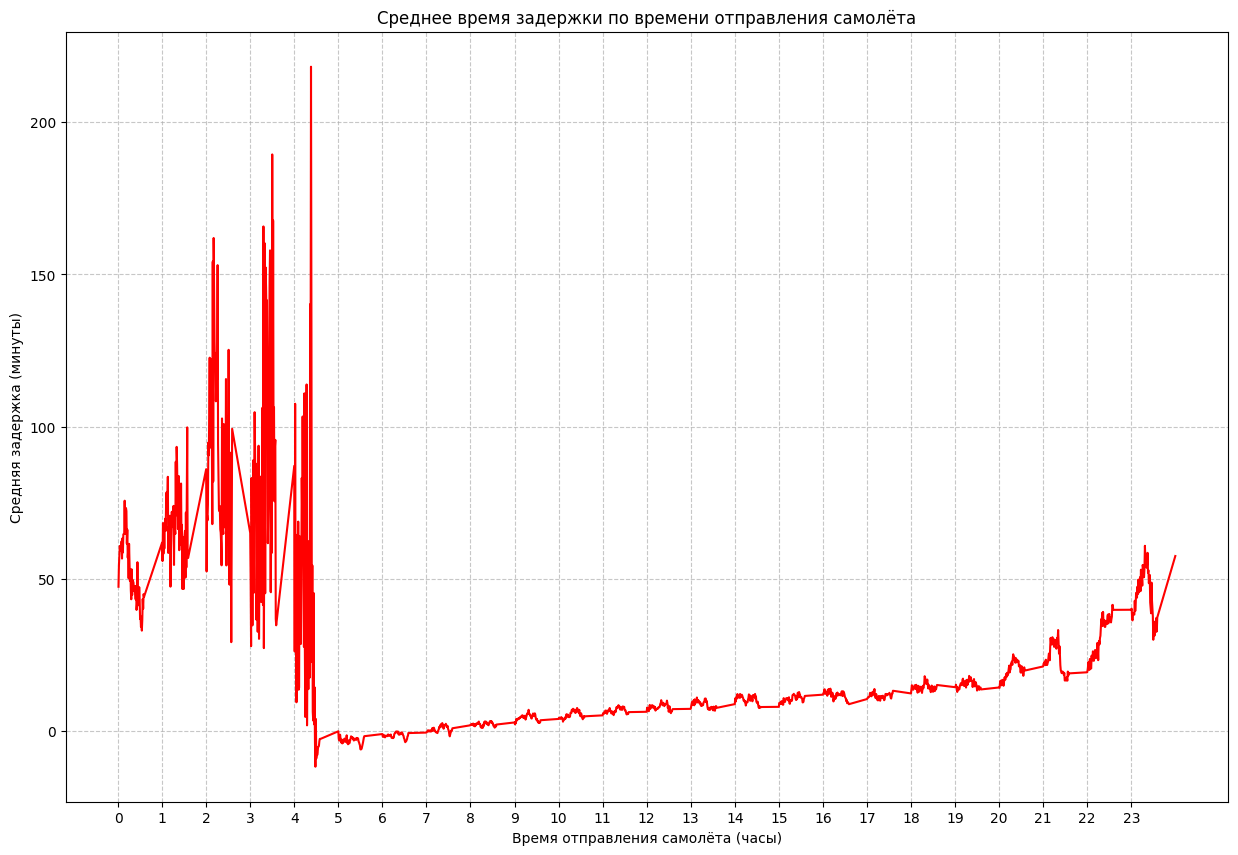

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Загрузка данных
flights = pd.read_csv('flights.csv', low_memory = False)
# График зависимости среднего времени задержки по времени отправления самолёта
avg = flights.groupby("DEPARTURE_TIME")["DEPARTURE_DELAY"].mean()
plt.figure(figsize=(15, 10))
plt.plot(avg.index / 100, avg.values,  linestyle='-', color='red')
plt.xlabel("Время отправления самолёта (часы)")
plt.ylabel("Средняя задержка (минуты)")
plt.title("Среднее время задержки по времени отправления самолёта")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.xticks(ticks=range(0, 24), labels=[str(i) for i in range(24)])
plt.show()



Рассмотрим среднее время задержки по времени отправления. Как видно из графика, часы с наибольшем временем задержки - 2- 4.5 часа ночи. Вероятно, это связано с ухудшением условий видимости в эти часы. Скорее всего, причина этого -туманы. Также, возможно, задержки вызваны недостатком персонала, которые готовы выполнять и обслуживать ночные рейсы.\
Рекомендации: 
1) Увеличить количество персонала и ресурсов для ночного обслуживания, чтобы ускорить процессы.
2) Улучшить прогнозирование погодных условий и заранее планировать альтернативные маршруты, если ожидаются туманы или низкая облачность.

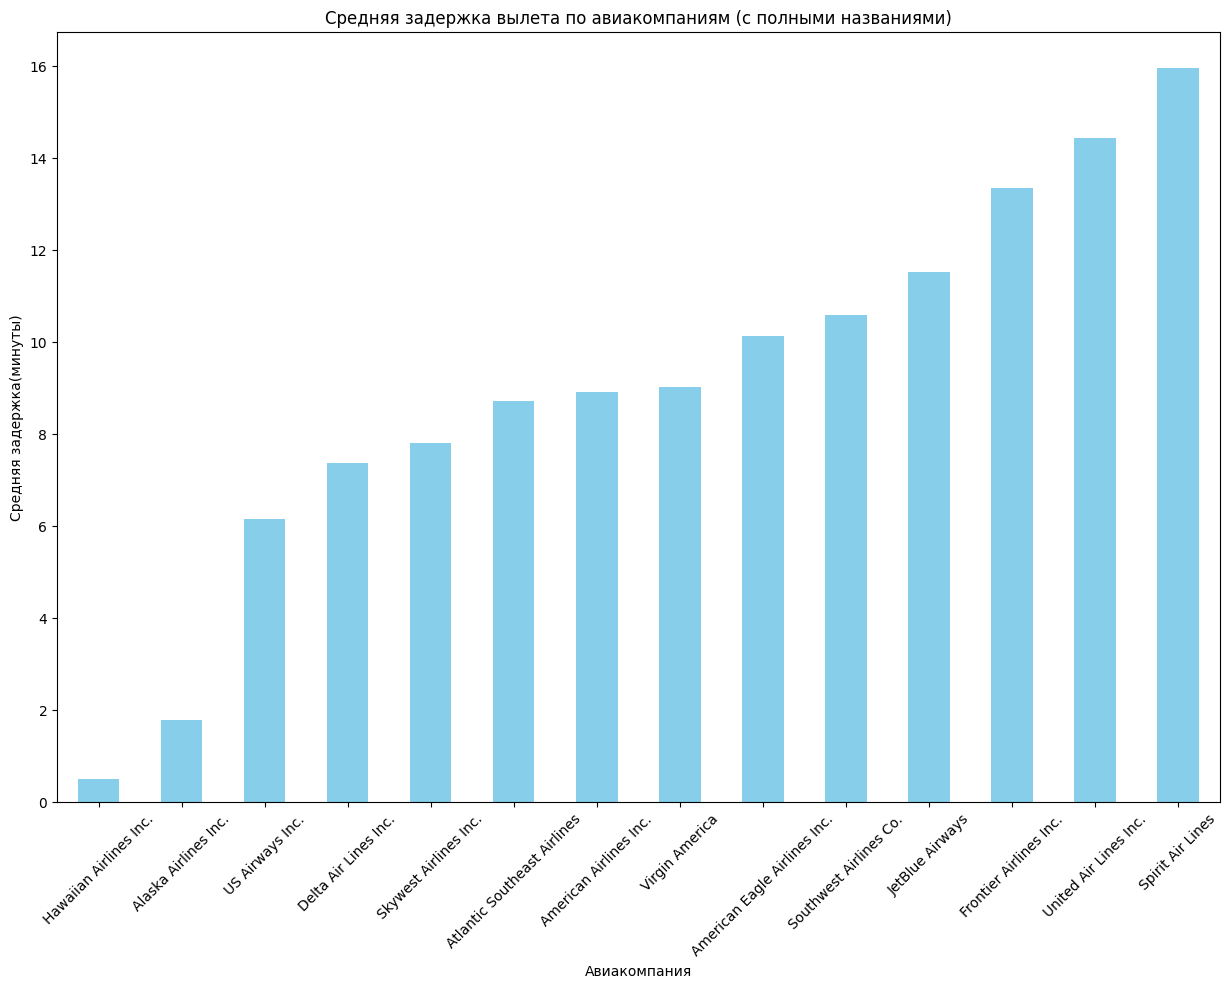

In [2]:
airlines = pd.read_csv('airlines.csv')
#Объединяем данные из flights.csv с airlines.csv, чтобы узнать полные название авиакомпаний и строим диаграмму
flights_with_airlines = pd.merge(flights, airlines, left_on='AIRLINE', right_on='IATA_CODE', how='left')
avg_dep_delay_by_airline_fullname = flights_with_airlines.groupby('AIRLINE_y')['DEPARTURE_DELAY'].mean().sort_values()
plt.figure(figsize=(15, 10))
avg_dep_delay_by_airline_fullname.plot(kind='bar', color='skyblue')
plt.title('Средняя задержка вылета по авиакомпаниям (с полными названиями)')
plt.xlabel('Авиакомпания')
plt.ylabel('Средняя задержка(минуты)')
plt.xticks(rotation=45)
plt.show()

Рассмотрим среднюю задержку в зависимости от авиалинии. Как мы видим, самые "надежные" авиалинии - Hawaiian Airlines и Alaska Airlines. Остальные же имеют среднюю задержку в 6-16 минут, при этом лидером по задержке является Spirit Air Lines. Причиной этого может быть проблемы с персоналом у авиалинии, проблемы с техническим состоянием самолетов, а также организационные проблемы (задержки доставки багажа, трапа и др.).\
Рекомендации: эти задержки можно минимизировать за счет улучшения логистики, повышения качества технического обслуживания и оптимизации расписания.

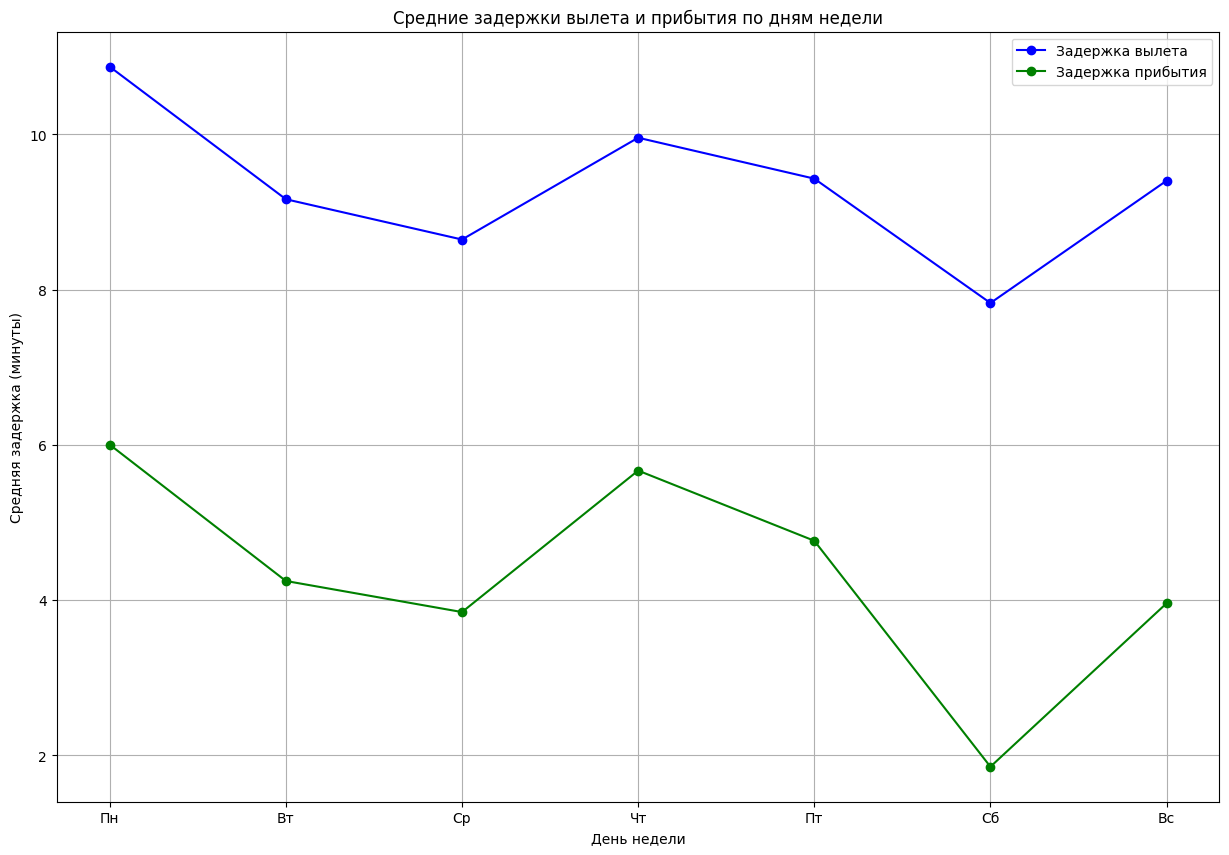

In [3]:
avg_dep_arr_delay_by_day = flights.groupby('DAY_OF_WEEK')[['DEPARTURE_DELAY', 'ARRIVAL_DELAY']].mean()
# Графики срдней задержки вылета/прилета
plt.figure(figsize=(15, 10))
plt.plot(avg_dep_arr_delay_by_day.index, avg_dep_arr_delay_by_day['DEPARTURE_DELAY'], marker='o', label='Задержка вылета', color='blue')
plt.plot(avg_dep_arr_delay_by_day.index, avg_dep_arr_delay_by_day['ARRIVAL_DELAY'], marker='o', label='Задержка прибытия', color='green')
plt.title('Средние задержки вылета и прибытия по дням недели')
plt.xlabel('День недели')
plt.ylabel('Средняя задержка (минуты)')
plt.xticks(range(1, 8), ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс'])
plt.legend()
plt.grid(True)
plt.show()

Рассмотрим задержку вылета и прибытия в зависимости от дня недели. Как видно из графиков, задержка вылета всегда больше задержки прибытия, т.к. задержки прибытия обычно следуют за задержками вылета. Если рейс вылетает с задержкой, он, скорее всего, прибудет с задержкой. Однако в силу того, что время прибытия обычно указывается "с запасом", возможны случаи, когда при задержанном вылете самолёт мог прилететь вовремя или чуть уменьшить задержку прибытия. Это объясняет то, что синий график выше зелёного. При этом, наиболее загруженные дни - понедельник и пятница, а наименее - среда и суббота. Это указывает на то, что в начале и конце недели аэропорты наиболее загружены, а в середине и в субботу желание людей летать в другие города заметно меньше.\
Рекомендации:
1) Авиакомпаниям следует сосредоточиться на минимизации задержек вылета, так как это напрямую влияет на задержки прибытия.
2) Внедрение более гибкого расписания и увеличение "буферного" времени между рейсами может помочь снизить влияние задержек вылета на прибытие, особенно в загруженные дни.

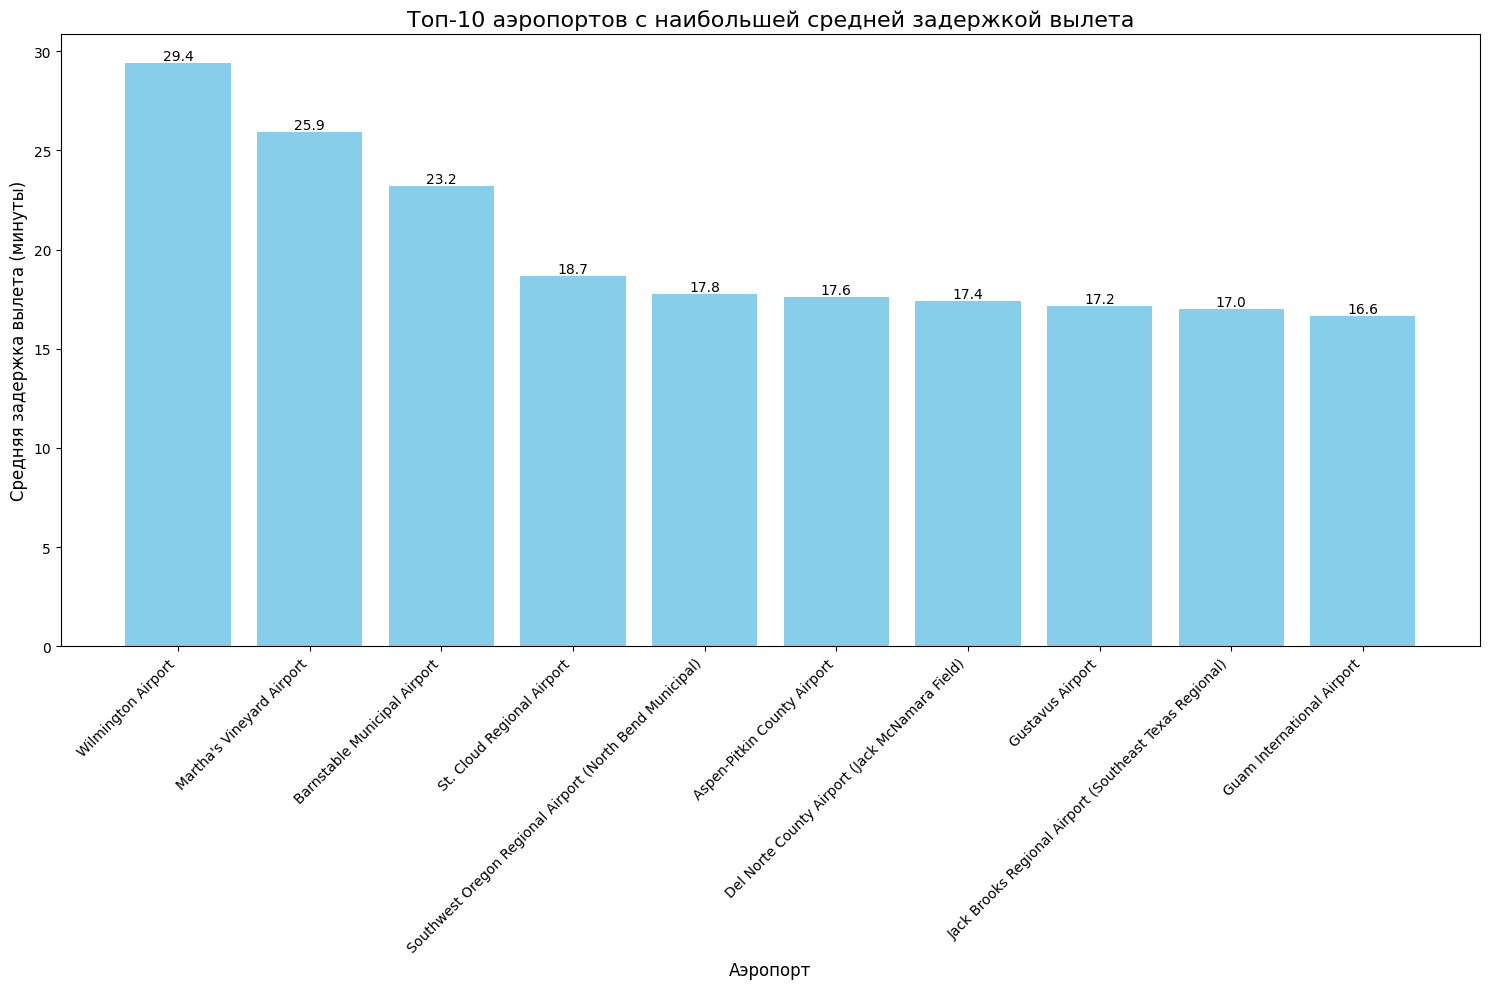

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


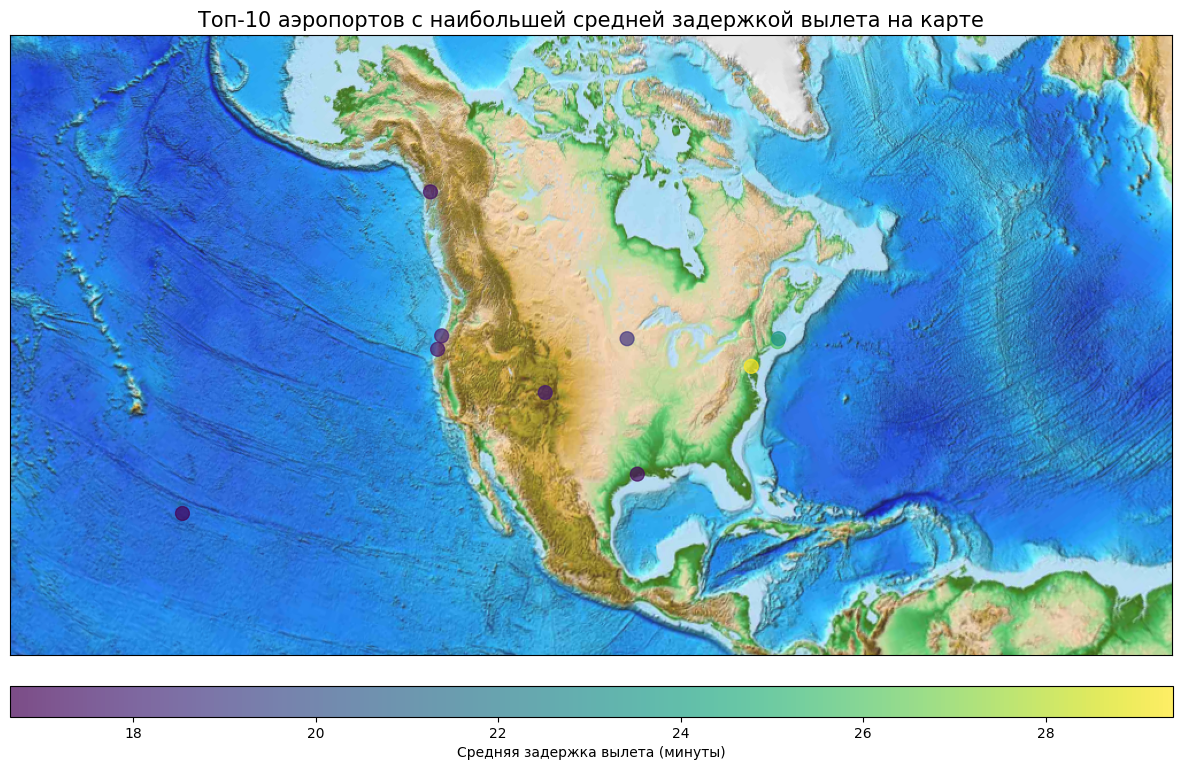

In [4]:
from mpl_toolkits.basemap import Basemap

airports = pd.read_csv('airports.csv')
# Группировка данных по аэропорту отправления и расчет средней задержки
avg_delay_by_airport = flights.groupby('ORIGIN_AIRPORT')['DEPARTURE_DELAY'].mean().reset_index()
avg_delay_by_airport.rename(columns={'ORIGIN_AIRPORT': 'IATA_CODE', 'DEPARTURE_DELAY': 'AVG_DEPARTURE_DELAY'}, inplace=True)
# Объединение с данными об аэропортах из airports.csv
airports_with_delay = pd.merge(airports, avg_delay_by_airport, on='IATA_CODE', how='left')
top_airports_delay = airports_with_delay.nlargest(10, 'AVG_DEPARTURE_DELAY')
plt.figure(figsize=(15, 10), dpi=100)
bars = plt.bar(top_airports_delay['AIRPORT'], top_airports_delay['AVG_DEPARTURE_DELAY'], color='skyblue')
plt.title('Топ-10 аэропортов с наибольшей средней задержкой вылета', fontsize=16)
plt.xlabel('Аэропорт', fontsize=12)
plt.ylabel('Средняя задержка вылета (минуты)', fontsize=12)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}', ha='center', va='bottom', fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.tight_layout() 
plt.show()
#Построение топ-10 аэропортов на карте
fig = plt.figure(figsize=(15, 10))
land = Basemap(projection='lcc', resolution=None,
               width=15E6, height=8E6,
               lat_0=45, lon_0=-100,)
land.etopo(scale=0.5, alpha=0.9)
x, y = land(top_airports_delay['LONGITUDE'].values, top_airports_delay['LATITUDE'].values)
scatter = land.scatter(x, y, c=top_airports_delay['AVG_DEPARTURE_DELAY'], cmap='viridis', alpha=0.7, s=100)
cbar = land.colorbar(scatter, location='bottom', pad="5%")
cbar.set_label('Средняя задержка вылета (минуты)')
plt.title('Топ-10 аэропортов с наибольшей средней задержкой вылета на карте', fontsize=15)
plt.show()

Рассмотрим 10 наиболее загруженных аэропортов. На карте видно, что большинство из них расположены надалеко от воды, что может указывать на то, что задержки вызваны погодными условиями (штормы и туманы). Некоторые расположены в центре материка, а значит, задержки могут быть вызваны высоким пассажиропотоком. \
Рекомендации:
1) Снижение влияния погодных условий (разработка планов действий на случай неблагоприятных погодных условий).
2) Перенаправление рейсов в ближайшие, менее загруженные аэропорты.

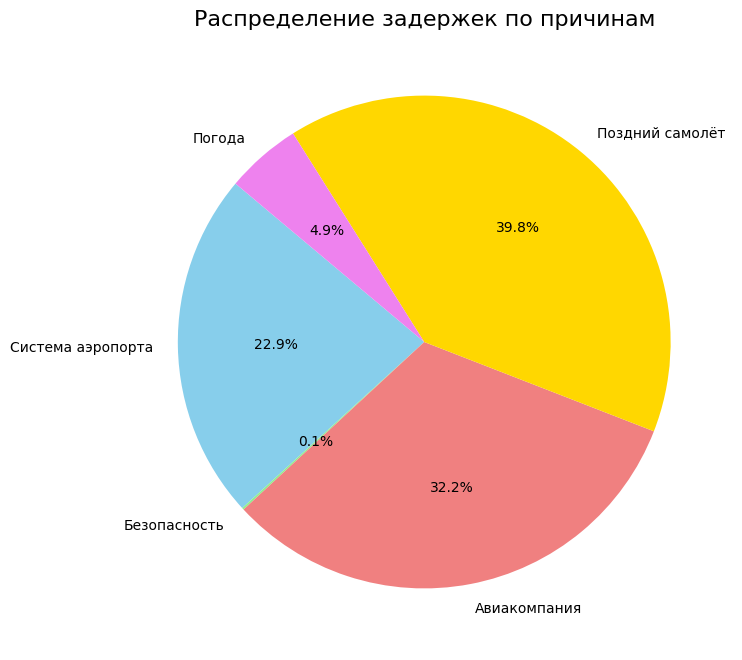

In [5]:
# Суммирование задержек по причинам
delay_causes = flights[['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']].sum()
labels = ['Система аэропорта', 'Безопасность', 'Авиакомпания', 'Поздний самолёт', 'Погода']
# Построение круговой диаграммы
plt.figure(figsize=(8, 8))
plt.pie(delay_causes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'lightcoral', 'gold', 'violet'])
plt.title('Распределение задержек по причинам', fontsize=16)
plt.show()

Перейдём к причинам задержки. Большинство рейсов задерживается из-за позднего самолёта и авиакомпании. Наименьшее количество задержек происходит из-за погоды и безопасности (из-за неё задержки почти не происходят). \
Рекомендации:
1)  Увеличение "буферного" времени и использование резервных самолётов. (поздние самолёты)
2)  Улучшение логистики и регулярное техническое обслуживание. (авиакомпании)
3)  Инвестиции в модернизацию аэропорта и оптимизацию расписания. (система аэропорта)
4)  Улучшение метеорологического оборудования. (погода)